# Parsing Dates

Another common data transformation involves parsing dates. Parsing generally means that you start with a string and then transform that string into a different data type. In this case, that means taking a date in the format of a string and transforming the string into a date type. Run the next cell to see an example.

In [1]:
import pandas as pd
parsed_date = pd.to_datetime('January 1st, 2017')
parsed_date

Timestamp('2017-01-01 00:00:00')

In [2]:
parsed_date.month

1

In [3]:
parsed_date.year

2017

In [4]:
parsed_date.second

0

Sometimes date string are formatted in unexpected ways. For example, in the United States, dates are given with the month first and then the day. That is what pandas expects by default. However, some countries write the date with the day first and then the month. Run the next three examples to see Panda's default behavior and how you can specify the date formatting.

In [5]:
parsed_date = pd.to_datetime('5/3/2017 5:30')
parsed_date.month

5

In [6]:
parsed_date = pd.to_datetime('5/3/2017 5:30', format='%d/%m/%Y %H:%M')
parsed_date.month

3

The formatting abbreviations are actually part of the python standard. You can see examples at [this link](http://strftime.org/).

# Part 1 - Parsing Dates

Run the code cells below to import the World Bank projects data. The last line of the code outputs all of the column names in the data frame.

In [8]:
# Run this code cell. Read in the projects data set with all columns type string
df_projects = pd.read_csv('./data/projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)
df_projects.columns
# select time related colunms
df_projects.head(15)[['boardapprovaldate', 'board_approval_month', 'closingdate']]

,boardapprovaldate,board_approval_month,closingdate
0,2018-06-28T00:00:00Z,June,NaN
1,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z
2,2018-06-28T00:00:00Z,June,NaN
3,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z
4,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z
5,2018-06-27T00:00:00Z,June,2019-12-31T00:00:00Z
6,2018-06-27T00:00:00Z,June,2023-10-31T00:00:00Z
7,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z
8,2018-06-27T00:00:00Z,June,2022-12-31T00:00:00Z
9,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z


In [9]:
# Use the pandas to_datetime method to convert these two columns 
#   (boardapprovaldate, closingdate) into date times.

df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])

# Part 2 - Access different parts of datetime

In [10]:
### 
# create the follwing new columns in the df_projects data frame
#
# approvalyear
# approvalday
# approvalweekday
# closingyear
# closingday
# closingweekday
#
#
###

df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday
df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

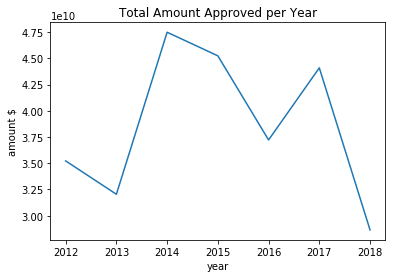

In [11]:
###
# Make a visualization with year on the x-axis and the sum of the totalamt columns per year on the y-axis
# The totalamt column is currently a string with commas. For example 100,250,364. You'll need to remove the
#         commas and convert the column to a numeric variable.
# pandas groupby, sum, and plot methods should also be helpful
####

import matplotlib.pyplot as plt
%matplotlib inline

# Step 1 - convert the totalamt column from string to numeric. Be sure to remove the commas in this column
df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',''))

ax = df_projects.groupby('approvalyear')['totalamt'].sum().plot(x='approvalyear', y='totalamt',
                                                          title ='Total Amount Approved per Year')
ax.set_xlabel('year')
ax.set_ylabel('amount $')
plt.show()